# Importing modules

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# Loading dataset

In [10]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\IMGA\\tech_layoffs.csv')
data.head(5)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [11]:
data.describe()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
count,489,489,489,489,489,489,489,489,22
unique,477,150,50,187,289,134,221,2,22
top,DataRobot,Unclear,Unclear,1/11/2023,Fintech,San Francisco,TechCrunch,Private,"Per Axios, 22 of the employees laid off were f..."
freq,2,182,133,12,24,136,52,370,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


In [14]:
data.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

In [15]:
#lets look into additional_notes column to explore more 
data['additional_notes']
data.drop(['additional_notes'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
dtypes: object(8)
memory usage: 30.7+ KB


In [16]:
data['total_layoffs'] =data['total_layoffs'].str.replace('Unclear','0')
data['impacted_workforce_percentage'] =data['impacted_workforce_percentage'].str.replace('Unclear','0')
data.tail()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
484,Salesforce,9090,0,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public
485,Oracle,0,0,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public
486,LivePerson,0,0,9/15/2022,Customer service,New York,LinkedIn,Public
487,Skillz,0,0,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public
488,Blueboard,0,0,11/3/2022,Enterprise Software,San Francisco,LinkedIn reports,Private


In [17]:
#lets check unique values
data['industry'].nunique()

289

In [18]:
data['Date'] = pd.to_datetime(data['reported_date'])
data['Month'] = data['Date'].dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.strftime('%Y')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    object        
 2   impacted_workforce_percentage  489 non-null    object        
 3   reported_date                  489 non-null    object        
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   sources                        489 non-null    object        
 7   status                         489 non-null    object        
 8   Date                           489 non-null    datetime64[ns]
 9   Month                          489 non-null    int64         
 10  Year                           489 non-null    object        
dtypes: datetime64[ns](1

In [19]:
#we can drop reported date, becacsue it is irrelevant now
data.drop(['reported_date'], axis = 1, inplace = True)
data.head()

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status,Date,Month,Year
0,C2FO,20,2,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022-12-09,12,2022
1,VideoAmp,0,2,Advertising platforms,Los Angeles,Company memo,Private,2022-09-19,9,2022
2,Amperity,13,3,"Saas, analytics",Seattle,Geekwire,Private,2022-08-20,8,2022
3,Addepar,20,3,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023-01-18,1,2023
4,Thirty Madison,24,3,Health Care,New York,Axios,Private,2022-05-13,5,2022


In [20]:
#lets change the datatype of total_layoffs, impacted_workforce_percentage into float and year into int
data[['total_layoffs', 'impacted_workforce_percentage']] = data[['total_layoffs', 'impacted_workforce_percentage']].astype('float')
data[['Year']] = data[['Year']].astype('int')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    float64       
 2   impacted_workforce_percentage  489 non-null    float64       
 3   industry                       489 non-null    object        
 4   headquarter_location           489 non-null    object        
 5   sources                        489 non-null    object        
 6   status                         489 non-null    object        
 7   Date                           489 non-null    datetime64[ns]
 8   Month                          489 non-null    int64         
 9   Year                           489 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 36.4+ KB

In [23]:
#lets check the total numberof employees laid of by private aand public companies in each month 

data.groupby(['status', 'Month'])['total_layoffs'].count()
data.groupby(['status', 'Year'])['total_layoffs'].count()

status   Year
Private  2022    323
         2023     47
Public   2022     85
         2023     34
Name: total_layoffs, dtype: int64

In [24]:
#lets check the most effected locations 
data.groupby(['headquarter_location', 'Year'])['total_layoffs'].count().sort_values(ascending =False)

headquarter_location  Year
San Francisco         2022    116
New York              2022     66
San Francisco         2023     20
Seattle               2022     18
Los Angeles           2022     18
                             ... 
Healdsburg, CA        2022      1
Hayward, California   2022      1
Hayward, CA           2022      1
Hamilton, OH          2023      1
Wilmington, NC        2023      1
Name: total_layoffs, Length: 153, dtype: int64

In [39]:
data.corr()

,total_layoffs,impacted_workforce_percentage,Month,Year
total_layoffs,1.000000,-0.368933,-0.288913,0.371768
impacted_workforce_percentage,-0.368933,1.000000,-0.124781,-0.093375
Month,-0.288913,-0.124781,1.000000,-0.904855
Year,0.371768,-0.093375,-0.904855,1.000000


<AxesSubplot:>

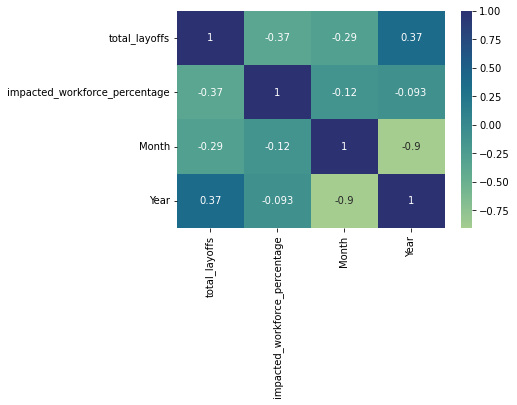

In [40]:
sns.heatmap(data.corr(),annot=True,cmap='crest')

<AxesSubplot:xlabel='company', ylabel='total_layoffs'>

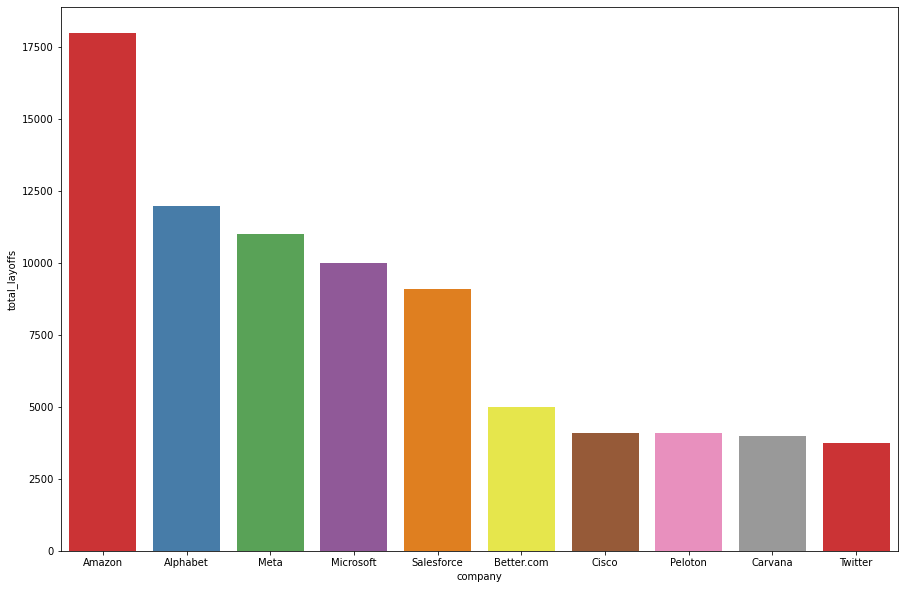

In [41]:
# barplot of the top 10 companies with the highest number of layoffs
plt.figure(figsize=(15,10))
sns.barplot(y='total_layoffs', x='company', data=data.sort_values('total_layoffs', ascending = False).head(10), palette = 'Set1')